# Data Story 4

This is the day 4 of telling stories with data. 

In this data I will try to analyse which countries and cities contribute the most to the world temperature

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's first check the land temperatures based on Countries.

In [3]:
# reading in GlobalLandTemperaturesByCountry.csv

gltc = pd.read_csv('../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')

In [5]:
gltc.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland


Now we can see that the data ranges from the year 1743 to 2013(not in all cases though) for each of the months.

Let's first randomly pick up one country and check it's data over the years. I am picking up the country Zimbabwe

In [6]:
#separating zimbabwe data
df = gltc[gltc['Country']=='Zimbabwe']

#dropping rows with NaN values
df.dropna(inplace=True)

# first lets bifurcate the months and year data for the dt
df.loc[:,'dt'] = pd.to_datetime(df['dt'])

df.loc[:,'month'] = [x.month for x in list(df['dt'])]
df.loc[:,'year'] = [x.year for x in list(df['dt'])]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

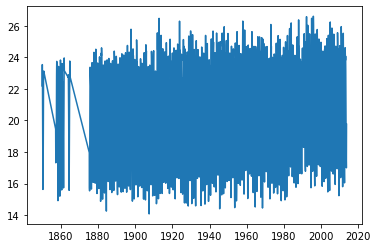

In [7]:
plt.plot(df['dt'], df['AverageTemperature'])
plt.show()

Not much sense can be made out of this plot so it's better to analyse one year data at a time

Let's then analyze the data for 2012 year(because it contains all the months)

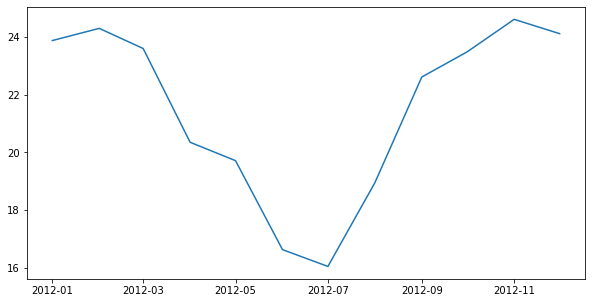

In [8]:
fig = plt.figure(figsize=(10,5))
plt.plot(df.loc[df['year']==2012, 'dt'], df.loc[df['year']==2012,'AverageTemperature'])
plt.show()

From the above plot w can deduce that the temperature in Zimbabwe reaches it's lowest point in the month of July but again starts rising after that which seems pretty odd because being an Indian I expect the least value to be around the months of Dec-Feb

Now let's check the couuntry that shows the highest temperature value in all these years.

Then I will analyse that country's data and maybe find out the top 10 contributors

In [9]:
#checking highest temperature

gltc[gltc['AverageTemperature']==gltc['AverageTemperature'].max()]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
284851,2012-07-01,38.842,0.464,Kuwait


Okay so the highest temperature reach was by the country Kuwait with an AverageTemperature of 38.842. It reached the highest temperature on July,2012

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

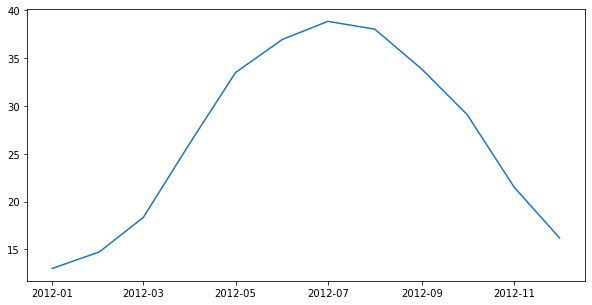

In [10]:
#lets analyse Kuwait daa throughout 2012

df = gltc[gltc['Country']=='Kuwait']
df.dropna(inplace=True)
df.loc[:,'dt'] = pd.to_datetime(df['dt'])
df.loc[:,'month'] = [x.month for x in list(df['dt'])]
df.loc[:,'year'] = [x.year for x in list(df['dt'])]
fig = plt.figure(figsize=(10,5))
plt.plot(df.loc[df['year']==2012, 'dt'], df.loc[df['year']==2012,'AverageTemperature'])
plt.show()

Lets see what the mean temperature is and then we can compare Kuwait temperature to it

In [11]:
mean_temp = gltc['AverageTemperature'].mean()

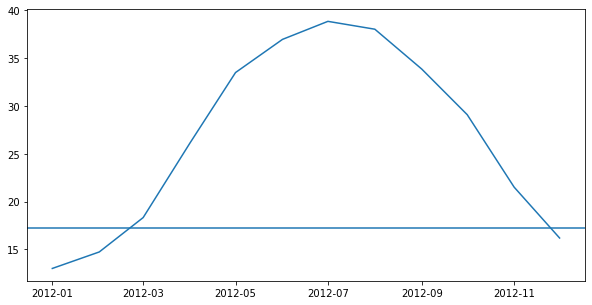

In [12]:
#lets plot again
fig = plt.figure(figsize=(10,5))
plt.plot(df.loc[df['year']==2012, 'dt'], df.loc[df['year']==2012,'AverageTemperature'])
plt.axhline(mean_temp)
plt.show()

Woh te situation doesn't seem too favourable for Kuwait.

Lets compare its performance for the last 5 years.

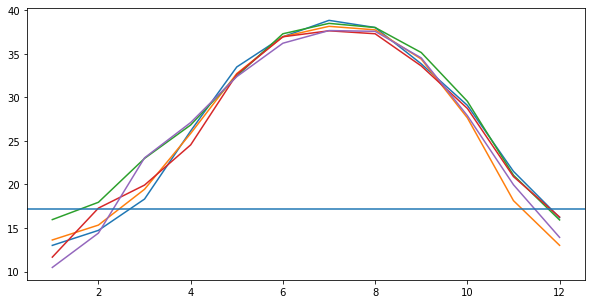

In [13]:
fig = plt.figure(figsize=(10,5))
plt.plot(df.loc[df['year']==2012, 'month'], df.loc[df['year']==2012,'AverageTemperature'])
plt.plot(df.loc[df['year']==2011, 'month'], df.loc[df['year']==2011,'AverageTemperature'])
plt.plot(df.loc[df['year']==2010, 'month'], df.loc[df['year']==2010,'AverageTemperature'])
plt.plot(df.loc[df['year']==2009, 'month'], df.loc[df['year']==2009,'AverageTemperature'])
plt.plot(df.loc[df['year']==2008, 'month'], df.loc[df['year']==2008,'AverageTemperature'])
plt.axhline(mean_temp)
plt.show()

Looking at the plot it seems obvious that the temperature of Kuwait remains that way throughout every year

Lets check the mean for each years

In [14]:
df['year'].unique()

array([1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849,
       1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 19

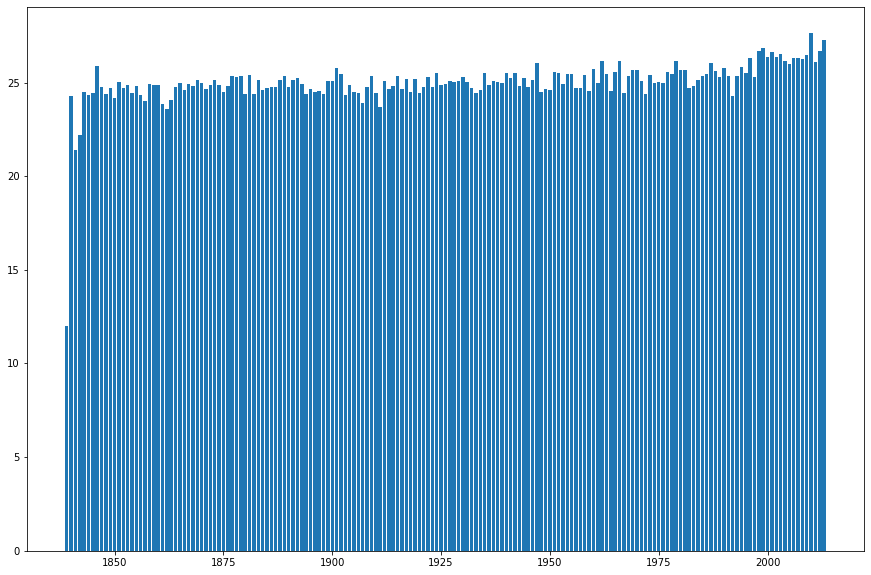

In [15]:
mean_by_year = []
for year in list(df['year'].unique()):
    df1 = df[df['year']==year]
    mean_by_year.append(df1['AverageTemperature'].mean())
    
fig = plt.figure(figsize=(15,10))
plt.bar(list(df['year'].unique()), mean_by_year)
plt.show()

This does not look good so let's the data for last 10 years

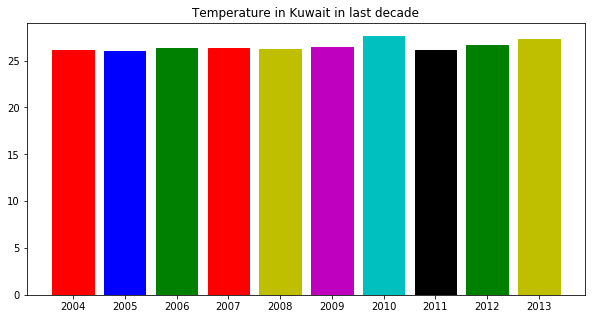

In [16]:
mean_by_year = []
years = list(df['year'].unique()[-10:])
for year in years:
    df1 = df[df['year']==year]
    mean_by_year.append(df1['AverageTemperature'].mean())
    
fig = plt.figure(figsize=(10,5))
barlist = plt.bar(years, mean_by_year)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
barlist[3].set_color('r')
barlist[4].set_color('y')
barlist[5].set_color('m')
barlist[6].set_color('c')
barlist[7].set_color('k')
barlist[8].set_color('g')
barlist[9].set_color('y')
plt.xticks(np.arange(2004,2014),labels=years)
plt.title('Temperature in Kuwait in last decade')
plt.show()

Okay now I thought of checking the top 5 countries who are having the highest average tempeartures in the year 2012

In [19]:
gltc['dt'] = pd.to_datetime(gltc['dt'])
df = gltc[gltc['dt'].dt.year==2012]
df = df.sort_values('AverageTemperature', ascending=False)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
284851,2012-07-01,38.842,0.464,Kuwait
284852,2012-08-01,38.020,1.001,Kuwait
548387,2012-07-01,37.713,0.784,United Arab Emirates
424300,2012-07-01,37.603,0.772,Qatar
47551,2012-07-01,37.471,0.554,Bahrain


Since I see that most countries reached their highest values at around the month of July, so let's consider only that month so that I get unique countries

In [25]:
df = gltc[(gltc['dt'].dt.year==2012) & (gltc['dt'].dt.month==7)]
df = df.sort_values('AverageTemperature', ascending=False)
top_countries = list(df['Country'].head())
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
284851,2012-07-01,38.842,0.464,Kuwait
548387,2012-07-01,37.713,0.784,United Arab Emirates
424300,2012-07-01,37.603,0.772,Qatar
47551,2012-07-01,37.471,0.554,Bahrain
458212,2012-07-01,36.495,0.556,Saudi Arabia


Okay so now I got my top 5 countries from the filtering. I will store them in a list and then check their temperature variation

In [29]:
gltc['month'] = gltc['dt'].dt.month
gltc['year'] = gltc['dt'].dt.year

In [32]:
gltc.

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
0,1743-11-01,4.384,2.294,Åland,11,1743
1,1743-12-01,NaN,NaN,Åland,12,1743
2,1744-01-01,NaN,NaN,Åland,1,1744
3,1744-02-01,NaN,NaN,Åland,2,1744
4,1744-03-01,NaN,NaN,Åland,3,1744


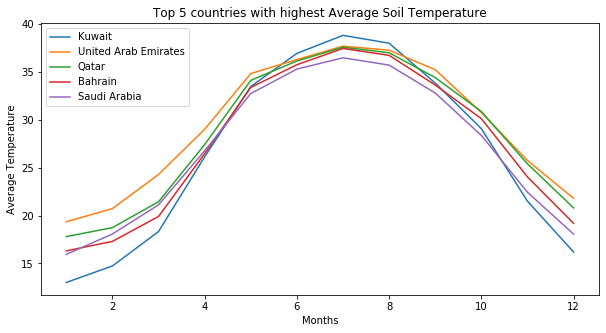

In [38]:
fig = plt.figure(figsize=(10,5))
for country in top_countries:
    plt.plot(gltc.loc[(gltc['year']==2012)&(gltc['Country']==country), 'month'], gltc.loc[(gltc['year']==2012)&(gltc['Country']==country),'AverageTemperature'], label=country)
plt.legend(loc="upper left")
plt.title('Top 5 countries with highest Average Soil Temperature for 2012')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.show()

Okay so this is where I end today's analysis. There is a lot more to explore in this data and it is fun as well. So I will continue again tomorrow.